# Example notebook `neuralib.plot`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from neuralib.io.dataset import load_example_rois
from neuralib.plot import (
    dotplot,
    violin_boxplot,
    scatter_histplot,
    diag_histplot,
    diag_heatmap,
    grid_subplots,
    VennDiagram
)

In [2]:
%load_ext autoreload
%autoreload

## Plot the data with violin and box with dots

In [3]:
df = load_example_rois()
print(df)

shape: (45_163, 17)
┌────────────┬─────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ name       ┆ acronym ┆ AP_locati ┆ DV_locati ┆ … ┆ merge_ac_ ┆ merge_ac_ ┆ merge_ac_ ┆ family    │
│ ---        ┆ ---     ┆ on        ┆ on        ┆   ┆ 2         ┆ 3         ┆ 4         ┆ ---       │
│ str        ┆ str     ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ str       │
│            ┆         ┆ f64       ┆ f64       ┆   ┆ str       ┆ str       ┆ str       ┆           │
╞════════════╪═════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Ectorhinal ┆ ECT5    ┆ -3.03     ┆ 4.34      ┆ … ┆ ECT       ┆ ECT       ┆ ECT       ┆ ISOCORTEX │
│ area/Layer ┆         ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ 5          ┆         ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ Perirhinal ┆ PERI6a  ┆ -3.03     ┆ 4.42      ┆ … ┆ PERI      ┆ PERI  

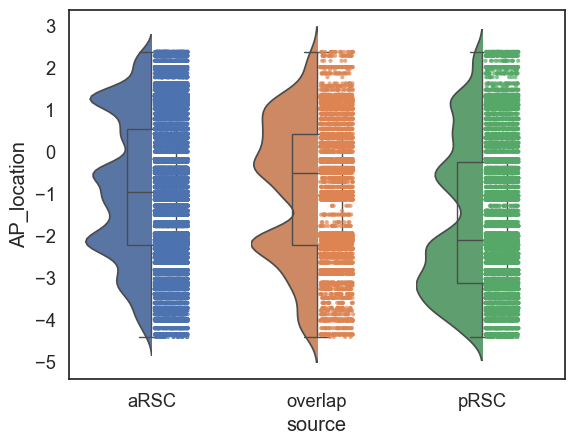

In [4]:
sns.set_theme(style='white', font_scale=1.2)
fig, ax = plt.subplots()
violin_boxplot(data=df, x='source', y='AP_location', hue='source', ax=ax)
plt.show()

## See correlation and histogram of two variables

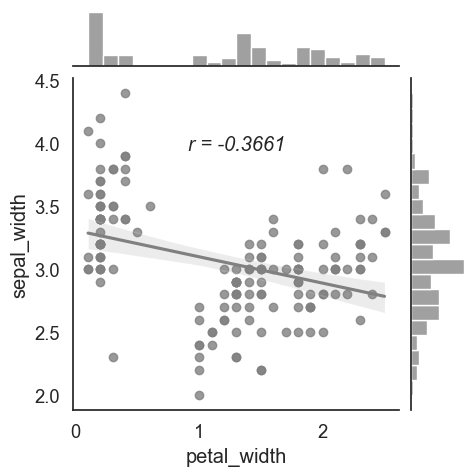

In [5]:
iris = sns.load_dataset('iris')
x = iris['petal_width']
y = iris['sepal_width']
scatter_histplot(x, y, linear_reg=True, bins=20)

## Diagonal plot value comparison
- same measurement(metric) in different condition (xy)

[(0.0, 1.0), (0.0, 1.0)]

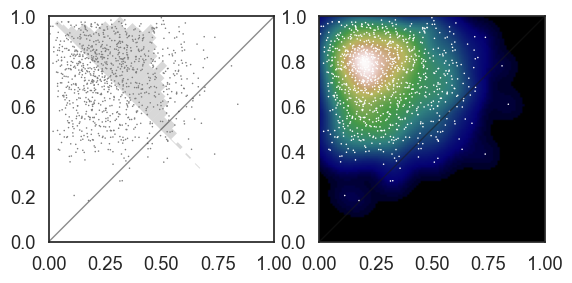

In [12]:
N = 1000

# create higher density with bias distribution
x = np.random.beta(a=2, b=5, size=N)
y = np.random.beta(a=5, b=2, size=N)

_, ax = plt.subplots(1, 2)
# with histogram
diag_histplot(x, y, ax=ax[0], scatter_kws={'s': 5, 'c': 'gray', 'marker': '.', 'edgecolors': 'none'})
# with heatmap
diag_heatmap(x, y, ax=ax[1], extent=(0, 1, 0, 1), scatter_kws={'s': 5, 'c': 'w', 'marker': '.', 'edgecolors': 'none'})
ax[0].set(xlim=(0, 1), ylim=(0, 1))

## Dotsplot with colormap

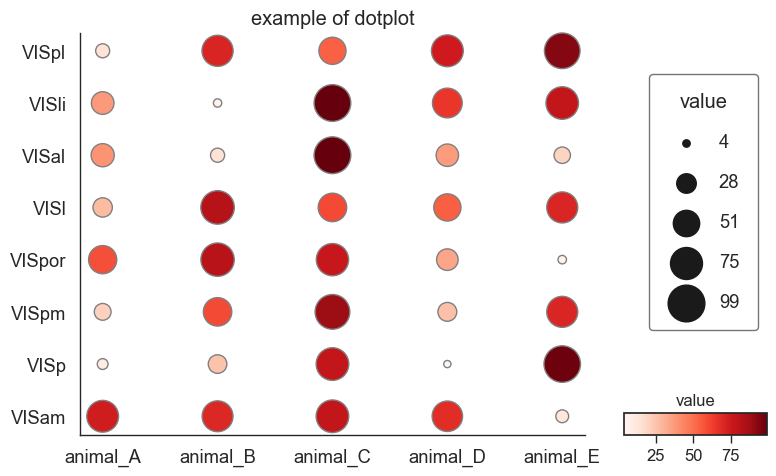

In [7]:
# (X,): different animals
xlabel = ['animal_A', 'animal_B', 'animal_C', 'animal_D', 'animal_E']

# (Y,): subregion in Visual Cortex as an example
ylabel = ['VISam', 'VISp', 'VISpm', 'VISpor', 'VISl', 'VISal', 'VISli', 'VISpl']

# values: Array[float, [X, Y]]
nx = len(xlabel)
ny = len(ylabel)
values = np.random.sample((nx, ny)) * 100

dotplot(xlabel, ylabel, values,
        scale='area',
        max_marker_size=700,
        with_color=True,
        figure_title='example of dotplot')


## Venn Diagram

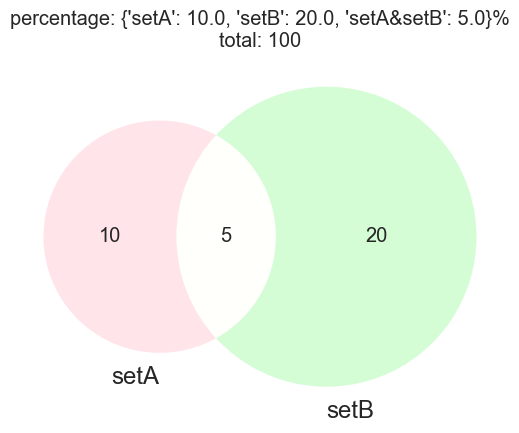

In [8]:
# 2 sets
subsets = {'setA': 10, 'setB': 20}
vd = VennDiagram(subsets, colors=('pink', 'palegreen'))
vd.add_intersection('setA & setB', 5)
vd.add_total(100)
vd.plot()
vd.show()

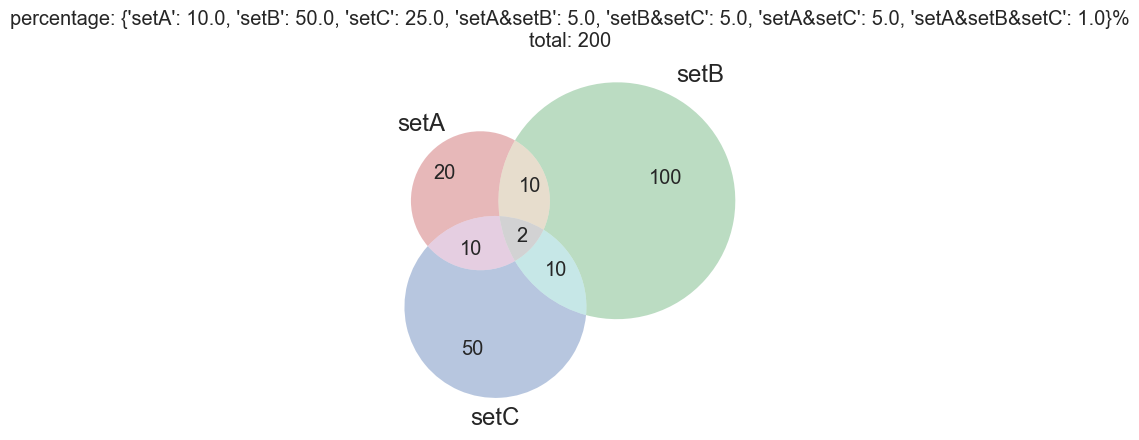

In [9]:
# 3 sets
subsets = {'setA': 20, 'setB': 100, 'setC': 50}
vd = VennDiagram(subsets)
vd.add_intersection('setA & setB', 10)
vd.add_intersection('setB & setC', 10)
vd.add_intersection('setA & setC', 10)
vd.add_intersection('setA & setB & setC', 2)
vd.add_total(200)
vd.plot()
vd.show()

## Grid subplots

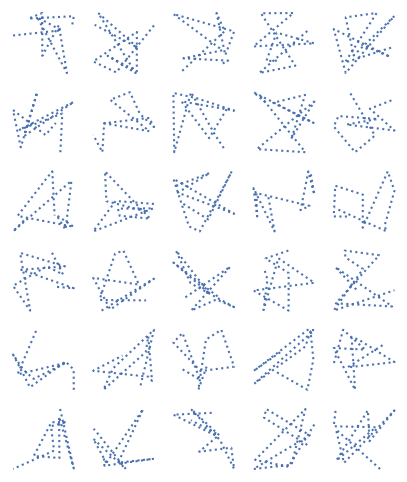

In [10]:
data = np.random.sample((30, 10, 2))
grid_subplots(data, 5, 'plot', dtype='xy', ls='dotted')

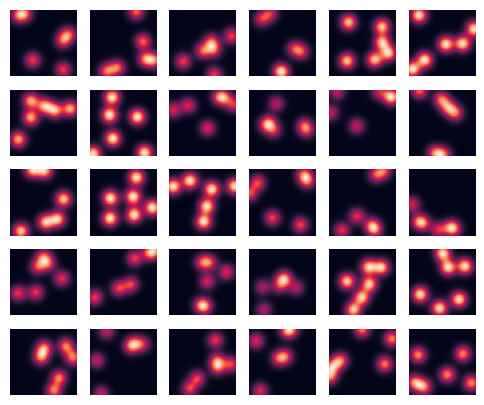

In [11]:
def generate_example_2d_tuning(blobs: int = 6) -> np.ndarray:
    """example mimic place cell place cell firing"""
    x, y = np.meshgrid(np.linspace(0, 6, 50), np.linspace(0, 6, 50))
    z = np.zeros_like(x)

    for _ in range(blobs):
        x0 = np.random.uniform(0, 6)
        y0 = np.random.uniform(0, 6)
        sigma = 0.5
        z += np.exp(-((x - x0) ** 2 + (y - y0) ** 2) / (2 * sigma ** 2))

    return z


data = [generate_example_2d_tuning() for i in range(30)]
grid_subplots(data, images_per_row=6, plot_func='imshow', dtype='img')